In [1]:
#Author SID: 1625920
#Neural Computing and Deep Learning MOD006568
#Anglia Ruskin University

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Student\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Student\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Student\anaconda3\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install visualkeras

You should consider upgrading via the 'C:\Users\Student\anaconda3\python.exe -m pip install --upgrade pip' command.


# Data Loading and Preprocessing

In [6]:
#Import and installing the necessary libraries to manipulate the data and  construct our CNN model
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPool2D, Activation, Dropout, Flatten
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from keras import optimizers
from keras.layers.core import Dropout
from keras.models import Sequential
from __future__ import print_function
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import matplotlib.image as mpimg
import imageio
from collections import Counter
from tensorflow.keras.utils import to_categorical


In [7]:
import os
import PIL.Image
import IPython.display
import glob 
import cv2

from PIL import ImageFilter, ImageStat, Image, ImageDraw, ImageFile, ImageFont
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Data Loading and Organisation

In [8]:
#Test to see if image will load according to the provided file directory
img = image.load_img(r"C:\Users\Student\Documents/Kaggle_Dataset/train/Type_1/0.jpg")

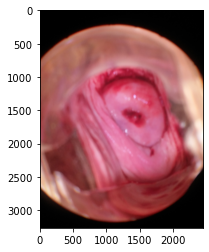

In [9]:
plt.imshow(img)

In [10]:
#Read the  image in a different data type 
cv2.imread(r"C:\Users\Student\Documents/Kaggle_Dataset/train/Type_1/0.jpg")

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [0, 0, 0],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

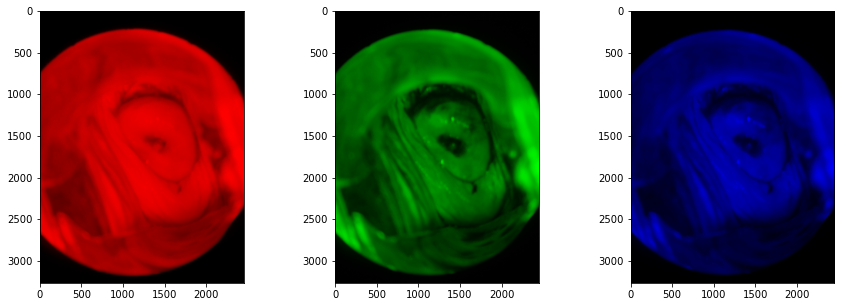

In [11]:
#Test to view image profiles and representation
im = imageio.imread(r"C:\Users\Student\Documents/Kaggle_Dataset/train/Type_1/0.jpg")
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))
for c, ax in zip(range(3), ax):
    split_img = np.zeros(im.shape, dtype="uint8")
    split_img[:, :, c] = im[:, :, c]
    ax.imshow(split_img)

In [12]:
cv2.imread(r"C:\Users\Student\Documents/Kaggle_Dataset/train/Type_1/0.jpg").shape

(3264, 2448, 3)

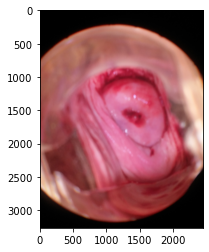

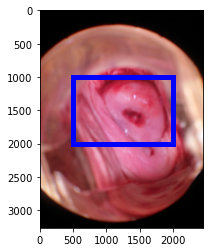

In [13]:
#draw a boundary box to isolate point of interest
x = np.array(Image.open(r"C:\Users\Student\Documents/Kaggle_Dataset/train/Type_1/0.jpg"), dtype=np.uint8)
plt.imshow(x)

fig, ax = plt.subplots(1)

ax.imshow(x)

rect = patches.Rectangle((500, 1000), 1500, 1000, linewidth=5, edgecolor='b', facecolor="none")

ax.add_patch(rect)
plt.show()

In [14]:
cv2.imread(r"C:\Users\Student\Documents/Kaggle_Dataset/test/4.jpg")

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

## 

We have to further categorise the different images in the train image folder

In [15]:
#Load the images into variables 
root_folder = r'C:\Users\Student\Documents\Kaggle_Dataset'

main_folder = os.path.join(r'C:\Users\Student\Documents/Kaggle_Dataset/train')

train_type1 = os.path.join(main_folder, 'Type_1')

train_type2 = os.path.join(main_folder, 'Type_2')

train_type3 = os.path.join(main_folder, 'Type_3')

test_folder = os.path.join(root_folder, 'test', 'test')

In [40]:
type1_data = glob.glob(train_type1+'/*.jpg')
type2_data = glob.glob(train_type2+'/*.jpg')
type3_data = glob.glob(train_type3+'/*.jpg')

test_data = glob.glob(test_folder+'/*.jpg')

In [41]:
print(f'''Test files = {len(test_data)}''')

Test files = 0


In [20]:
len(type1_data), len(type2_data), len(type3_data), len(test_folder)

(250, 781, 450, 51)

In [21]:
#Transform our images to dataframes
data = {'filepath': type1_data + type2_data + type3_data, 'label': ['Type_1']* len(type1_data) + ['Type_2']* len(type2_data) + ['Type_3']* len(type3_data)}

data_df = pd.DataFrame(data).sample(frac=1, random_state=1).reset_index(drop=True)
data_df

,filepath,label
0,C:\Users\Student\Documents/Kaggle_Dataset/trai...,Type_1
1,C:\Users\Student\Documents/Kaggle_Dataset/trai...,Type_2
2,C:\Users\Student\Documents/Kaggle_Dataset/trai...,Type_1
3,C:\Users\Student\Documents/Kaggle_Dataset/trai...,Type_3
4,C:\Users\Student\Documents/Kaggle_Dataset/trai...,Type_2
...,...,...
1476,C:\Users\Student\Documents/Kaggle_Dataset/trai...,Type_2
1477,C:\Users\Student\Documents/Kaggle_Dataset/trai...,Type_2
1478,C:\Users\Student\Documents/Kaggle_Dataset/trai...,Type_3
1479,C:\Users\Student\Documents/Kaggle_Dataset/trai...,Type_1


In [22]:
print('label', data['label'])

label ['Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Type_1', 'Ty

In [23]:
data_df.describe()

,filepath,label
count,1481,1481
unique,1481,3
top,C:\Users\Student\Documents/Kaggle_Dataset/trai...,Type_2
freq,1,781


In [24]:
print(data_df.shape)

(1481, 2)


In [25]:
count_type = pd.DataFrame(data_df['label'].value_counts()).rename(columns= {'label': 'Total'})
count_type

,Total
Type_2,781
Type_3,450
Type_1,250


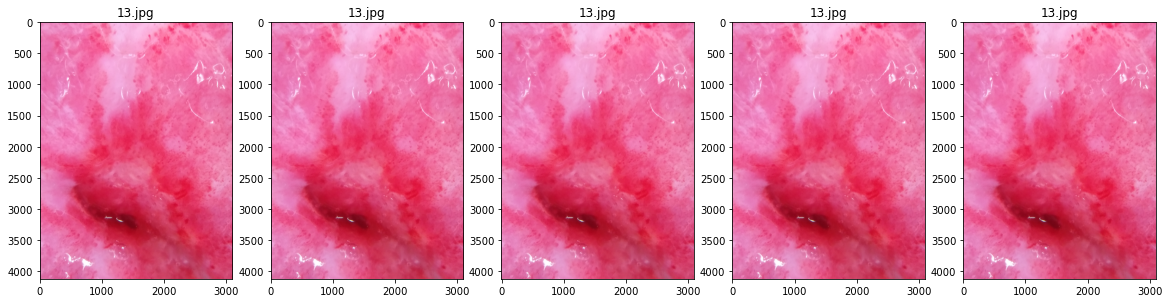

In [26]:
#Dispaly set of images to ensure folder has been read into kaggle file

plt.figure(figsize=(20,20))
test_fold = r'C:\Users\Student\Documents/Kaggle_Dataset/train'
for i in range(5):
    file = random.choice(os.listdir(main_folder))
    image_path= os.path.join(main_folder, '13.jpg' )
    img2=mpimg.imread(r"C:\Users\Student\Documents/Kaggle_Dataset/train/Type_1/13.jpg")
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text('13.jpg')
    plt.imshow(img2)

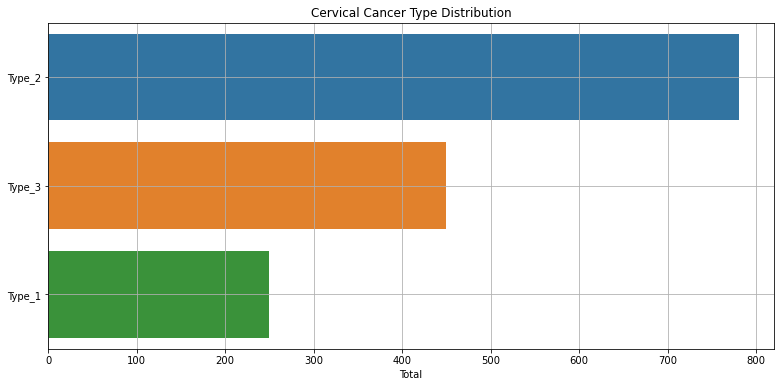

In [27]:
import seaborn as sns

plt.figure(figsize = (13, 6))
sns.barplot(x= count_type['Total'], y= count_type.index.to_list())
plt.title('Cervical Cancer Type Distribution')
plt.grid(True)
plt.show()

From the graph below, the model may develop a bias towards Type2 labelled data after training

# Data Processing and Feature Extraction


In [28]:
#Specifying the image size and dims
img_width, img_height = 150, 150

In [29]:
#Splitting our dataframe into trainset, validation set and test set 
train_images, test_images, train_labels, test_labels = train_test_split(data_df['filepath'].values, data_df['label'].values, test_size=0.3, random_state=42)

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)

print(train_images.shape, val_images.shape, test_images.shape)
print('Train:', Counter(train_labels), '\nVal:', Counter(val_labels), '\nTest:', Counter(test_labels))

(932,) (104,) (445,)
Train: Counter({'Type_2': 491, 'Type_3': 281, 'Type_1': 160}) 
Val: Counter({'Type_2': 49, 'Type_3': 39, 'Type_1': 16}) 
Test: Counter({'Type_2': 241, 'Type_3': 130, 'Type_1': 74})


In [30]:
#Data Augmentation for our train set and test set
data_aug = ImageDataGenerator(rescale=1. /255, rotation_range=90, horizontal_flip=True,
                             vertical_flip=True,zoom_range=0.2,shear_range=0.2)
val_aug = ImageDataGenerator(rescale=1. /255)

aug_train = data_aug.flow_from_directory(main_folder, target_size = (img_width, img_height), batch_size=64, class_mode="categorical", shuffle=True)
#Unfortunately the test folder refused to be recognised , I downloaded the test folder several times and it seems to have problems with the Augmentation function
aug_test = val_aug.flow_from_directory(test_folder, target_size = (img_width, img_height), batch_size=64, class_mode="categorical", classes=['test'])

Found 1481 images belonging to 3 classes.
Found 0 images belonging to 1 classes.


# Model Building

In [31]:
input_shape = (img_width, img_height,3)

In [32]:
epochs = 10

batch_size= 32

nb_train_samples = 1481


In [33]:
#Simple CNN Model for test run of accuracy and performance

model = Sequential()
model.add(Conv2D(64, (3, 3), kernel_initializer='random_normal', input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer='random_normal'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer='random_normal'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, kernel_initializer="random_normal"))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3, kernel_initializer='random_normal'))
model.add(Activation('softmax'))

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [43]:
print(len(model.layers))
model.summary()

15
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                 

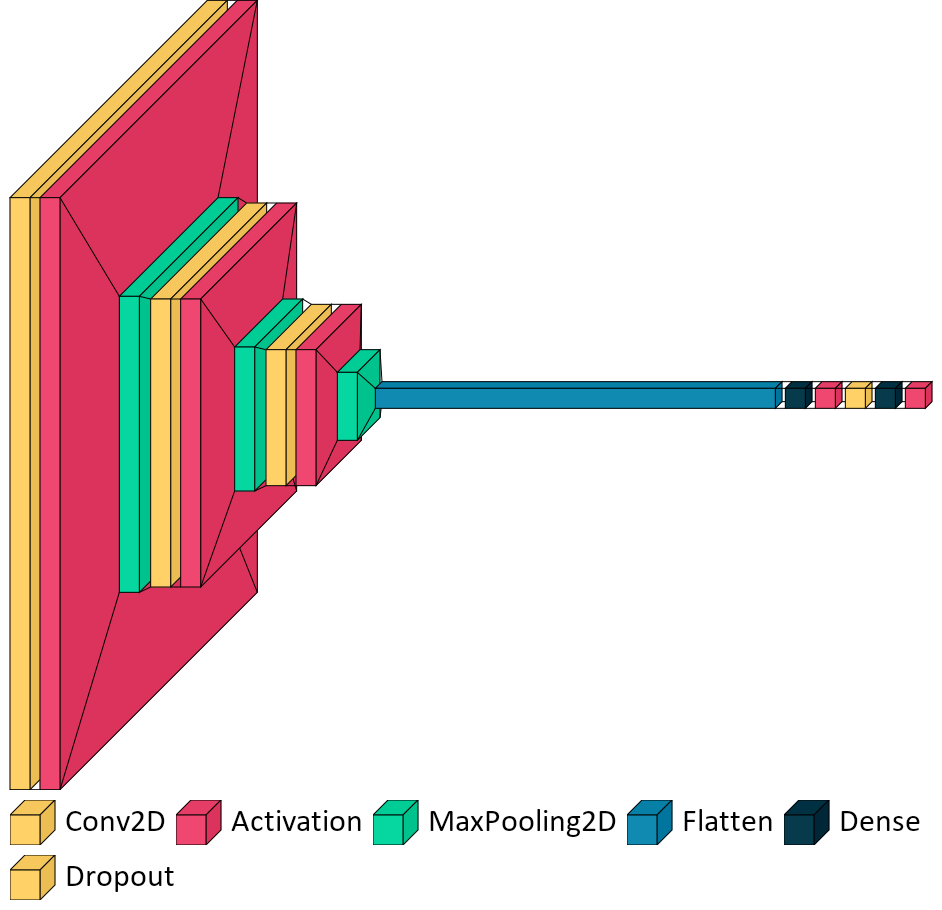

In [36]:
#Visualise Model
import visualkeras
visualkeras.layered_view(model)

from PIL import ImageFont

font = ImageFont.truetype("calibri.ttf", 32)

visualkeras.layered_view(model, legend=True, font=font)

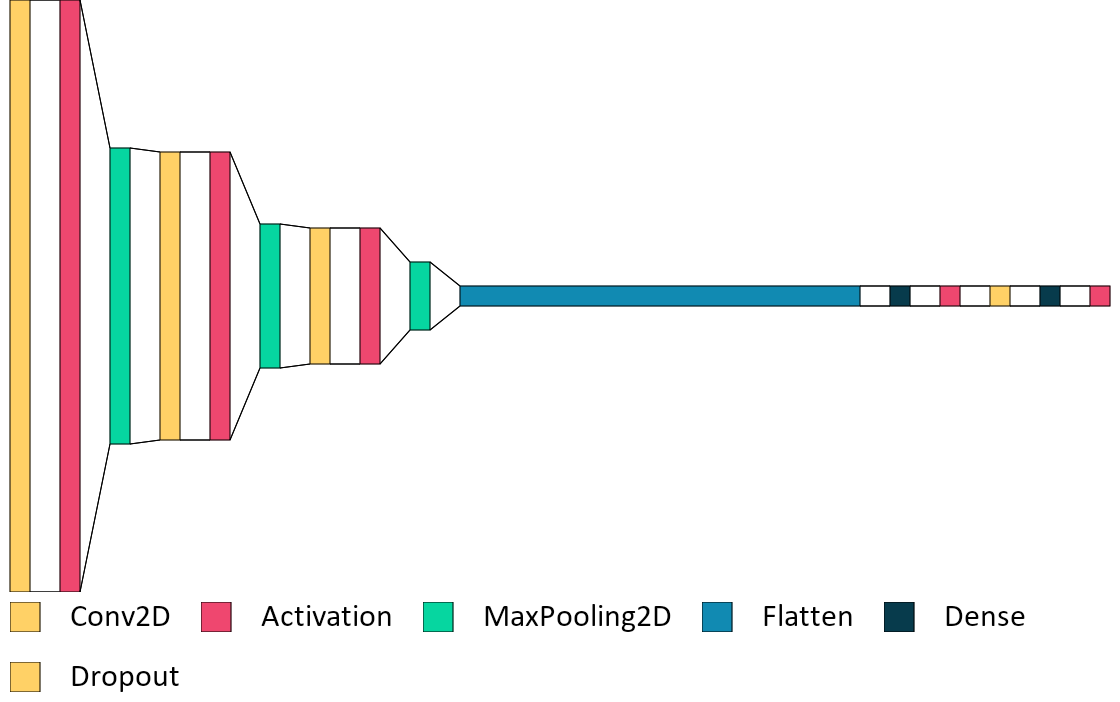

In [37]:
visualkeras.layered_view(model, legend=True, font=font, draw_volume=False,spacing=30)

In [38]:
history = model.fit(aug_train, batch_size = 20, epochs=epochs)

Epoch 1/10
24/24 [==============================] - 370s 15s/step - loss: 1.0256 - accuracy: 0.5165
Epoch 2/10
24/24 [==============================] - 422s 18s/step - loss: 1.0020 - accuracy: 0.5273
Epoch 3/10
24/24 [==============================] - 426s 18s/step - loss: 0.9791 - accuracy: 0.5273
Epoch 4/10
24/24 [==============================] - 431s 18s/step - loss: 0.9574 - accuracy: 0.5294
Epoch 5/10
24/24 [==============================] - 433s 18s/step - loss: 0.9563 - accuracy: 0.5294
Epoch 6/10
24/24 [==============================] - 433s 18s/step - loss: 0.9424 - accuracy: 0.5192
Epoch 7/10
24/24 [==============================] - 417s 17s/step - loss: 0.9321 - accuracy: 0.5361
Epoch 8/10
24/24 [==============================] - 439s 18s/step - loss: 0.9250 - accuracy: 0.5463
Epoch 9/10
24/24 [==============================] - 420s 17s/step - loss: 0.9338 - accuracy: 0.5348
Epoch 10/10
24/24 [==============================] - 411s 17s/step - loss: 0.9177 - accuracy: 0.5523

In [39]:
history_df = pd.DataFrame(history.history)
